This should be the final notebook prior to following more complex qiskit tutorials as this should be the final major thing to cover. The task is to create a simple circuit which applies $Y$ pauli spin gate on two qubits with an angle of $\theta$, then entangle them with a $CNOT$ then finally apply another $Y$ pauli spin gate with an angle of $\phi$. To increase flexibility, each qubit will have its own angle assigned for each layer of the circuit. Then we want to determine the expectation value when we apply the $ZZ$ operator upon this system.

In [9]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import time
from qiskit.circuit import Parameter

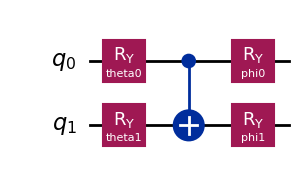

In [10]:
# Creates the Parameters

theta0 = Parameter("theta0") # theta for q0
theta1 = Parameter("theta1") # theta for q1

phi0 = Parameter("phi0")# phi for q0
phi1 = Parameter("phi1")# phi for q1

#Observables



#Circuit Info
qubits = 2

qc = QuantumCircuit(qubits)
qc.ry(theta0,0)
qc.ry(theta1,1)
qc.cx(0,1)
qc.ry(phi0,0)
qc.ry(phi1,1)

qc.draw("mpl")

1000


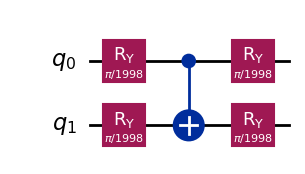

In [41]:
circuits = []
theta0_vals = np.linspace(0,np.pi/2,1000)
theta1_vals = np.linspace(0,np.pi/2,1000)
phi0_vals = np.linspace(0,np.pi/2,1000)
phi1_vals = np.linspace(0,np.pi/2,1000)

for parameter in range(len(theta0_vals)):
    values = {
        theta0: theta0_vals[parameter],
        theta1: theta1_vals[parameter],
        phi0: phi0_vals[parameter],
        phi1: phi1_vals[parameter],
    }

    circuits.append(qc.assign_parameters(values))

print(len(circuits))
circuits[1].draw("mpl")

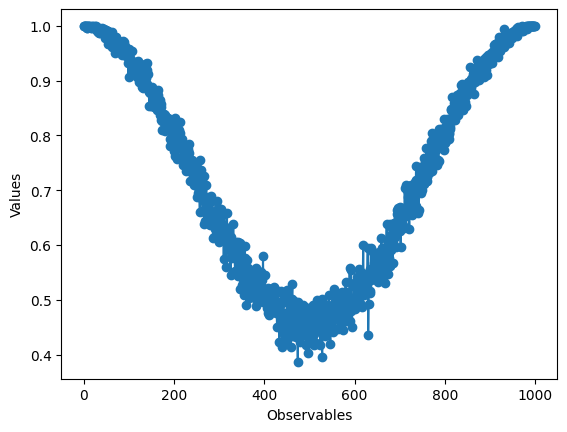

In [42]:
results_full = []
estimator = Estimator()
Observable  = SparsePauliOp("ZZ")
for i in range(len(circuits)):
    results_full.append(estimator.run(circuits[i],Observable).result().values[0])

from matplotlib import pyplot as plt

# plotting graph
plt.plot(range(len(results_full)), results_full, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

So, now we know how to parametrize quantum circuits. Now I think its finally time to go ahead and attempt quantum chemistry. Of course, all while still simulating things.